# Integração com IA Generativa 

Vou utilizar a OpenAi como meu modelo de LLM.

## ------------------------------------------------------------------------------

### Relembrando os insights que analisei.

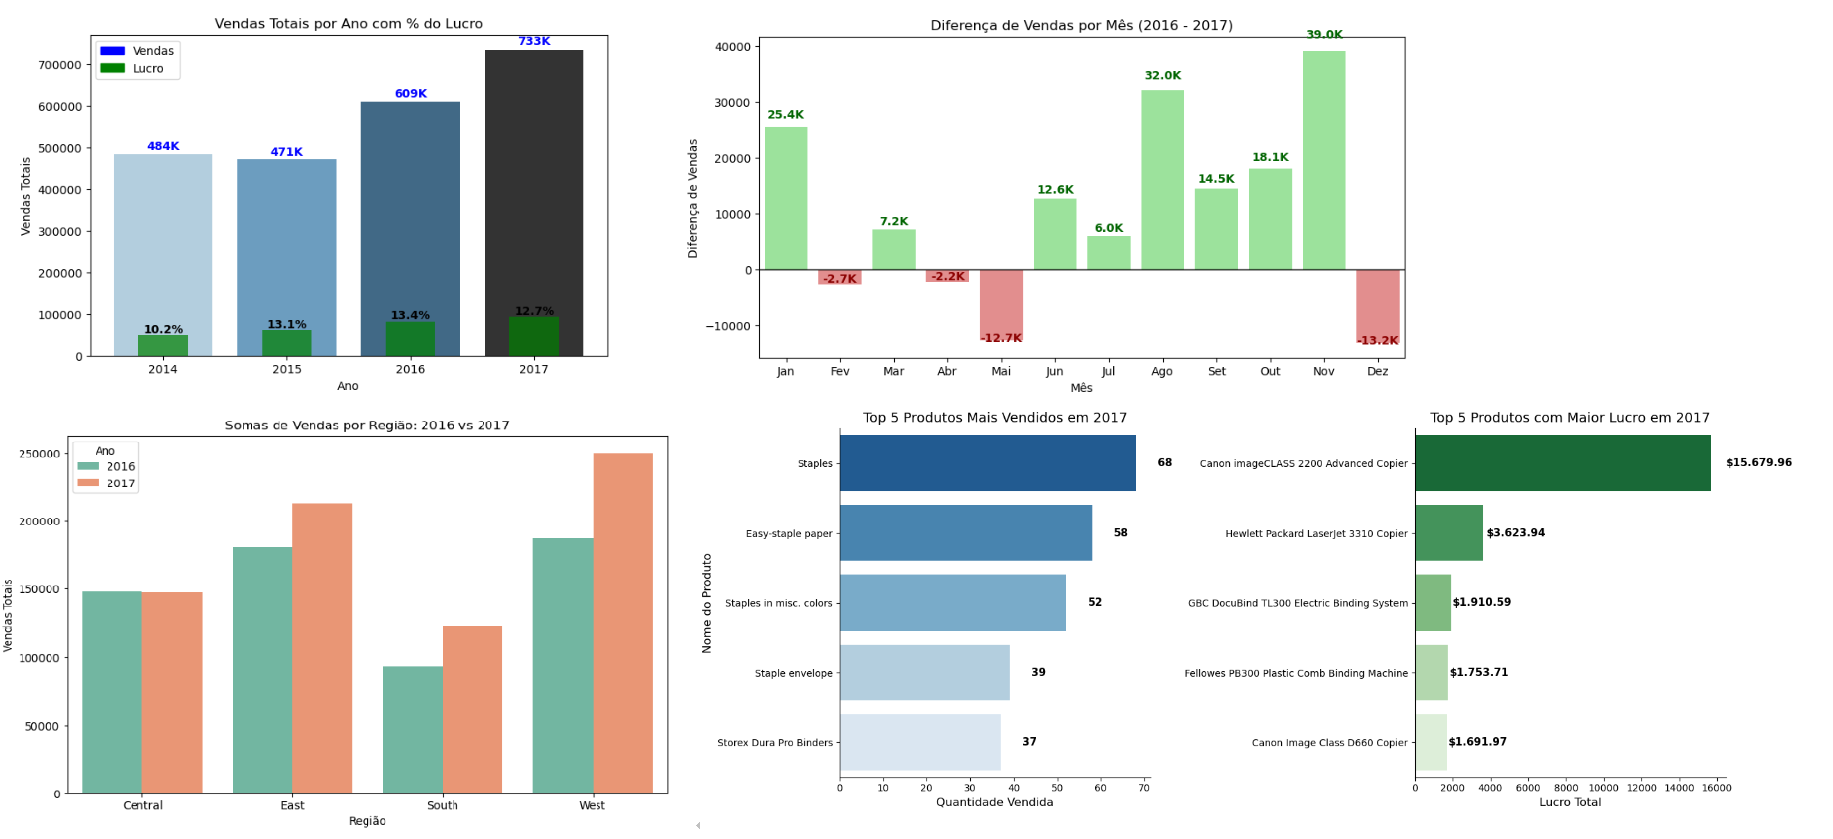

In [1]:
# Imports
from openai import OpenAI
from IPython.display import display, Markdown, update_display

In [ ]:
# Importando o modelo
client = OpenAI() # Coloque sua chave de APi no arquivo ".env" para funcionar
MODEL_GPT = 'gpt-4o-mini' # Escolhendo o modelo

### Insights que fizemos anteriormente no desafio 1

In [ ]:
insights= [
    "'Vendas Totais por Ano com % do Lucro': Em 2014 tivemos 484 mil de vendas e 10.2% de lucro bruto, em 2015 471 mil de vendas e 13.1% de lucro bruto, em 2016 609 mil de vendas e 13.4% de lucro bruto e em 2017 733 mil de vendas e 12.7% de lucro bruto.", 

    "'Diferença de Vendas por Mês (2016 e 2017)': Vou relatar as diferenças do ano atual(2017) com o ano anterior(2016), Em 2017 dejaneiro comparado com janeiro do ano anterior(2016) tivemos uma boa diferença + 25000 em vendas, fevereiro -2700 vendemos menos que no ano passado, março +7200, maio -12700, junho +12600, julho +6000, agosto +32000, setembro +14500, outubro 18100, novembro 39000, dezembro -13200.",

    "'Comparando a soma de Vendas por Região de 2016 e 2017': central 2016=150000/2017=150000, leste 2016=180000/2017=210000, sul 2016=95000/2017=2015000, oeste 2016=185000/2017=250000.",

    "'Comparando produtos entre mais vendido e mais lucrativos': Primeiro os 5 mais vendidos, 1-'Staples': 68, 2-'Staple Paper': 58, 3-'Staples Colorfull': 52, 4-'Staple envelope':49, 5-'Storex Dura Pro Blinders': 37. Agora os 5 mais lucrativos, nome e lucro: 1-'Canon image class2200 advanced copier': 15679, 2-'Hewlett Packard Laserjet 3310 copier': 3623, 3-'GBC DocuBind TL300 Eletric Binding': 1910, 4-'Fellowes PB300 Plastic Comb Binding Machine': 1753, 5-'Canon Image Class D660 Copier': 1691."
]

In [4]:
# Transformando eles em String
insights_text = ""

for number, i in enumerate(insights):
    insights_text += f"{number+1}-"+ i + "\n"
print(insights_text)

1-'Vendas Totais por Ano com % do Lucro': Em 2014 tivemos 484 mil de vendas e 10.2% de lucro bruto, em 2015 471 mil de vendas e 13.1% de lucro bruto, em 2016 609 mil de vendas e 13.4% de lucro bruto e em 2017 733 mil de vendas e 12.7% de lucro bruto.
2-'Diferença de Vendas por Mês (2016 e 2017)': Vou relatar as diferenças do ano atual(2017) com o ano anterior(2016), Em 2017 dejaneiro comparado com janeiro do ano anterior(2016) tivemos uma boa diferença + 25000 em vendas, fevereiro -2700 vendemos menos que no ano passado, março +7200, maio -12700, junho +12600, julho +6000, agosto +32000, setembro +14500, outubro 18100, novembro 39000, dezembro -13200.
3-'Comparando a soma de Vendas por Região de 2016 e 2017': central 2016=150000/2017=150000, leste 2016=180000/2017=210000, sul 2016=95000/2017=2015000, oeste 2016=185000/2017=250000.
4-'Comparando produtos entre mais vendido e mais lucrativos': Primeiro os 5 mais vendidos, 1-'Staples': 68, 2-'Staple Paper': 58, 3-'Staples Colorfull': 52, 

### Criando o prompt para o modelo

In [ ]:
system_prompt = f"""
Aqui estão alguns insights sobre as vendas de uma loja:

{insights_text}

Com base nesses insights, explique de forma detalhada quais ações o time de vendas pode tomar para aumentar a receita.\n
Crie uma resposta em markdown.
"""

In [6]:
messages = [
    {
        "role": "system",
        "content": system_prompt
    },
]

### Gerando a resposta do modelo

In [8]:
stream = client.chat.completions.create(
    model=MODEL_GPT,
    messages=messages,
    stream=True
)
response = ""
display_handle = display(Markdown(""), display_id=True)
for chunk in stream:
    response += chunk.choices[0].delta.content or ''
    response = response.replace("```","").replace("markdown", "")
    update_display(Markdown(response), display_id=display_handle.display_id)


# Estratégias para Aumentar a Receita da Loja

Com base nos insights fornecidos sobre as vendas da loja, é possível identificar algumas oportunidades e estratégias que o time de vendas pode tomar para aumentar a receita. Abaixo estão as ações recomendadas:

## 1. **Aprimorar o Mix de Produtos**

### Foco nos Produtos Mais Lucrativos
Com os dados dos produtos mais lucrativos em mente, o time de vendas deve:
- **Priorizar a Promoção**: Incentivar a venda dos produtos que geram maior lucro, como a 'Canon image class 2200 advanced copier'. 
- **Treinamento da Equipe**: Treinar a equipe de vendas para que conheçam bem as características e benefícios desses produtos, capacitando-os a realizar vendas mais consultivas.

### Diversificação do Estoque
Analise a possibilidade de diversificar o estoque de produtos vendidos, especialmente na categoria de produtos menos lucrativos, a fim de garantir uma oferta mais atraente.

## 2. **Campanhas de Marketing Dirigidas**

### Promoções Sazonais
- **Desenvolver Promoções**: Criar campanhas promocionais nos meses em que houve queda nas vendas, como fevereiro e maio de 2017. Ofertas atrativas podem ajudar a reverter esse cenário.
  
### Segmentação Regional
- **Campanhas Regionalizadas**: Uma vez que a venda na região Leste e Sul teve um crescimento significativo, criar campanhas específicas para essas regiões, focando nos produtos que mais vendem nelas.

## 3. **Análise Mensal de Vendas**

### Avaliação Mensal
- **Revisão Mensal das Vendas**: Realizar uma análise mensal detalhada para entender quais meses apresentam queda nas vendas e por que isso ocorre. A partir dessa análise, aplicar ações corretivas para aumentar a receita nos meses críticos.

## 4. **Fidelização de Clientes**

### Programa de Fidelidade
- **Implementar um Programa de Fidelidade** que recompense clientes que compram frequentemente. Isso pode aumentar a lealdade dos clientes e incentivar compras adicionais.

### Feedback do Cliente
- **Coletar Feedback**: Criar um canal de feedback onde os clientes possam fornecer opiniões sobre produtos e serviços. Essa informação pode ser crucial para ajustar a oferta de produtos.

## 5. **Treinamento e Engajamento da Equipe**

### Capacitação da Equipe de Vendas
- **Investir em Treinamento**: Realizar treinamentos regulares para a equipe de vendas sobre técnicas de vendas e informações aprofundadas sobre o portfólio de produtos.
  
### Motivação
- **Incentivos de Desempenho**: Criar um sistema de recompensas por metas de venda alcançadas, para motivar a equipe a melhorar a performance.

## 6. **Ajuste de Preços e Condições de Pagamento**

### Revisão de Preços
- **Análise de Preços**: Verificar se os preços estão alinhados com o mercado e ajustá-los quando necessário para tornar os produtos mais competitivos.

### Condições Atraentes
- **Facilitar Condições de Pagamento**: Propor condições mais atrativas que incentivem compras maiores, como parcelamento sem juros ou descontos para pagamentos antecipados.

## Conclusão
Implementando essas ações, o time de vendas pode não apenas aumentar a receita, mas também melhorar a experiência do cliente, fortalecer a lealdade e garantir um crescimento sustentável a longo prazo.

